## INTRODUCTION
### Data Description

> This dataset is a no show appointment dataset which collects information from 100 thousand medical appointments in Brazil. The main purpose of the dataset is to know if patients showed up for thier appointments or not. There are some important information included in the dataset , such as appointment day, schedule day, if they are on scholarship(if they are enrolled in Brasilain wellfare program ) and others.

### Question(s) for Analysis

> Below are some questions I intend to find answer to when analysing the dataset
- Are there more patients enrolled in the brasilian wellfare (that is are they on scholarship)?
- Are there more patients suffering from hypertension?
- Are there more patients sufferering from diabetes?
- Are there more patients who are handicaped? 
- Are there more patients taking alcohol?
- Are there more patients who are handicaped?
- Are there more patients who recieved an SMS?
- Are there more patients who showed up for their appointment? 
- Whichs days of the week and which month did the patients showed up more ? 
- Is showing up for appointment dependent on sending SMS? 
- Which hospital do patients visit the  most for thier appointments?
- Which days do patients on scholarship showed up the least for thier appointments?
- Which age category showed up for thier appointments the most?
- Is showing up for appointment depedent on gender?
- What's the percentage of patients who scheduled and showed up for thier appointments on the same day?

In [39]:
# Importing the neccessary python Libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Data Wrangling

> I will make use of the folowing data cleaning steps.

- Load the dataset using Pandas and read a few lines: This is to have an overview of the dataset.
- Get the information about the dataset: This is to check if there are any errors in the data types.
- Get the shape of the dataset: This is to know the number of rows and columns in the dataset.
- Check for duplicated rows
- Check for empyty columns

In [40]:
# Loading the dataset using pandas and reading few lines.
df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


> This dataset contains the patient ID, appointment ID, gender and other vital information about each patient such as ,if the patient is suffering from hypertension, diabetes,alcoholism, or the patient is handicapped.

In [41]:
# Getting information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


> All the data types are appropiate expect for the ScheduledDay and AppointmentDay columns.
There are no errors in the following columns: Scholarship, Hipertension, Diabetes, Alcholism, Handcap, and SMS_recieved because 1 represents yes and 0 represents No.

In [42]:
# Getting the shape of the data, that is the number of rows and columns.
df.shape

(110527, 14)

> The total number of samples(i.e number of patients) collected was 110,527 and there are 14 columns. 

In [43]:
# Checking if there are duplicated rows
df.duplicated().sum()

0

> There are no duplicated rows in the dataset

In [44]:
# computing general statistics for the dataset
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


> The maximum age of the patients is 115, while the minimun age is less than 1 year. The averag age of the patient is 37. There is a data quality issue with the minimum age.

In [45]:
# Checking for empyty columns
df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

> There are no columns with empty values.

### Accessing Data
- Incorrect spelling of some of the columns: PatientID as PatientId, Hypertension as Hipertension, Handicap as Handcap, No_show as No-show
- Negative sign in the Age column
- Inappropiate datatype for ScheduledDay and AppointmentDay
- Mismatch number of records: No-show column records were mismatched. 'No' in this dataset means that the patients showed up while 'Yes' means that they didn't show up for their appointments.

### Data Cleaning
- I will replace the incorrect spellings with the correct spellings.
- I will remove the negative sign in the age.
- I will convert the ScheduledDay and AppointmentDay to thier appropiate data types.
- I will replace the mismatched values in the No_show column with the appropiate values

In [46]:
# Replacing the incorrect spellings
df.rename(columns={'PatientId': 'PatientID',
                         'Hipertension': 'Hypertension',
                          'No-show': 'No_show',
                        'Handcap': 'Handicap'}, inplace = True)

In [47]:
# checking if the column names were properly replaced
df.head(5)

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


> The column names were properly replaced

In [48]:
# removing the negative sign from the age
df.Age.replace(-1 , 1, inplace = True )

In [49]:
# calling out the Age column again
df.Age

0         62
1         56
2         62
3          8
4         56
          ..
110522    56
110523    51
110524    21
110525    38
110526    54
Name: Age, Length: 110527, dtype: int64

In [50]:
# checking if the negative sign has been removeed.
df.describe()

,PatientID,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088892,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110176,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


> The negative sign has been removed. Now, the maximum age is 115 and the minimum age is 0

In [51]:
# Changing the data types of the 'ScheduledDay' and 'AppointmentDay' columns
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [52]:
# Checking if the data types was properly converted.
df.dtypes

PatientID                     float64
AppointmentID                   int64
Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hypertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handicap                        int64
SMS_received                    int64
No_show                        object
dtype: object

> The datatype was converted appropiately

In [53]:
#Replacing the unique values in the No_show column with 'Present' and 'Absent'
No_show_replacement = {"No" : "Present", "Yes" : "Absent"}
df["No_show"].replace(No_show_replacement, inplace = True)

In [54]:
# Checking if the values were properly replaced
df.head()

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,Present
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,Present
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,Present
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Present
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,Present


> The mismatched values in the No_show column were repalced appropiately

## Exploratory Data Analysis

> My dataset is now ready for analysis, so I will proceed with exploring the dataset.

In [55]:
# Defining a function for an histogram in order to avoid a repitive code.
def custom_plot(x):
      plt.hist(x)
      plt.show()

### Are there more patients enrolled in the Brasillian wellfare (that is, are they on scholarship) ? 

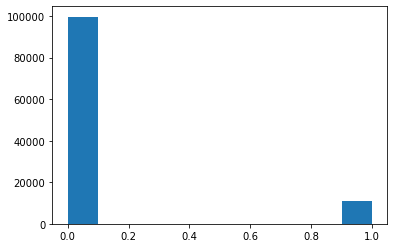

In [56]:
custom_plot(df['Scholarship'])

> This is an histogram chart to determine if there are more patients on scholarship.

### Are there more patients suffering from hypertension?

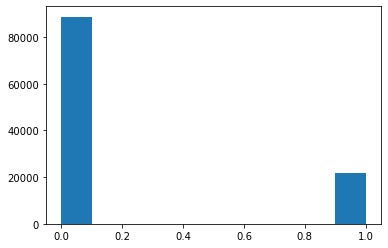

In [57]:
custom_plot(df['Hypertension'])

> This an histogram chart to determine if there are more patients suffering from hypertension

### Are there more patients suffering from diabetes? 

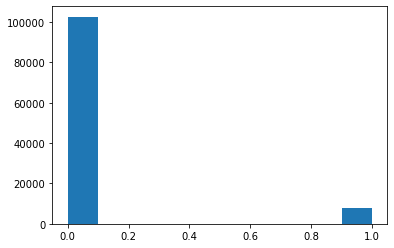

In [58]:
custom_plot(df['Diabetes'])

> This is an histogram chart to determine if there are more patients who suffers from diabetes.

### Are there more patients taking alcohol?

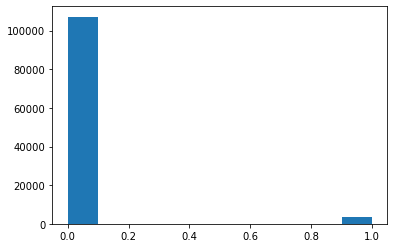

In [59]:
custom_plot(df['Alcoholism'])

> This histogram chart is to determine if there are more patients taking alcohol

### Are there more patients who are handicaped? 

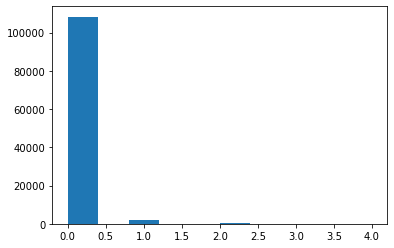

In [60]:
custom_plot(df['Handicap'])

> This histogram is to determine if there are more patients who are handicapped

### Are there more patients who recieved an SMS?

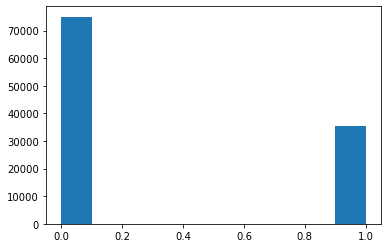

In [61]:
custom_plot(df['SMS_received'])

> This histogram is to determine if there are more patients who recieved an SMS

### Are there more patients who showed up for the appointment?

<AxesSubplot:>

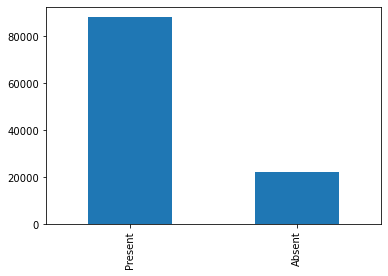

In [62]:
df['No_show'].value_counts().plot(kind='bar')

> This bar chart is to determine if there are more patients who showed up for the appointment.

### Feature Engineering for the remaining exploratory data analysis

In [63]:
#Extracting the date from the 'ScheduledDay' and 'AppointmentDay' columns
df['Scheduled_date'] = df['ScheduledDay'].dt.date
df['Appointment_date'] = df['AppointmentDay'].dt.date

#Extracting the time from the 'ScheduledDay' column
df['Scheduled_time'] = df['ScheduledDay'].dt.time

In [64]:
#Function for extracting day_name, month_name and year
def feature_engineer(df_1, days, months, years, feature):
    df_1[days] = df_1[feature].dt.day_name()
    df_1[months] = df_1[feature].dt.month_name()
    df_1[years] = df_1[feature].apply(lambda x: x.year)
    
feature_engineer(df, 'Scheduled_day', 'Scheduled_month', 'Scheduled_year', 'ScheduledDay')
feature_engineer(df, 'Appointment_day', 'Appointment_month', 'Appointment_year', 'AppointmentDay')

In [65]:
##Extracting the hour, minute and second from the 'Scheduled_time'column
df['Scheduledtime_hour'] = df['Scheduled_time'].apply(lambda x: x.hour)
df['Scheduledtime_min'] = df['Scheduled_time'].apply(lambda x: x.minute)
df['Scheduledtime_sec'] = df['Scheduled_time'].apply(lambda x: x.second)

In [66]:
# Grouping the ages
bin_edges = [0, 18, 37, 55, 115]
bin_names = ['Teens', 'Youth', 'Adult', 'Elderly']
df['Age_groups'] = pd.cut(df['Age'], bin_edges, labels = bin_names)
df.head()

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,...,Scheduled_day,Scheduled_month,Scheduled_year,Appointment_day,Appointment_month,Appointment_year,Scheduledtime_hour,Scheduledtime_min,Scheduledtime_sec,Age_groups
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,...,Friday,April,2016,Friday,April,2016,18,38,8,Elderly
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,...,Friday,April,2016,Friday,April,2016,16,8,27,Elderly
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,...,Friday,April,2016,Friday,April,2016,16,19,4,Elderly
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,...,Friday,April,2016,Friday,April,2016,17,29,31,Teens
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,...,Friday,April,2016,Friday,April,2016,16,7,23,Elderly


In [67]:
#Dropping some columns to avoid multi collinearity
df.drop(columns = ['ScheduledDay', 'AppointmentDay', 'Scheduled_date', 'Appointment_date', 'Age', 'Scheduled_time'], inplace = True)

### Which days of the week and which months did the patients showed up more?

In [68]:
#Taking the subset of the dataset where the patients showed up for their appointments.
showed_up = df[df['No_show'] == 'Present']
showed_up.head()

,PatientID,AppointmentID,Gender,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,...,Scheduled_day,Scheduled_month,Scheduled_year,Appointment_day,Appointment_month,Appointment_year,Scheduledtime_hour,Scheduledtime_min,Scheduledtime_sec,Age_groups
0,2.987250e+13,5642903,F,JARDIM DA PENHA,0,1,0,0,0,0,...,Friday,April,2016,Friday,April,2016,18,38,8,Elderly
1,5.589978e+14,5642503,M,JARDIM DA PENHA,0,0,0,0,0,0,...,Friday,April,2016,Friday,April,2016,16,8,27,Elderly
2,4.262962e+12,5642549,F,MATA DA PRAIA,0,0,0,0,0,0,...,Friday,April,2016,Friday,April,2016,16,19,4,Elderly
3,8.679512e+11,5642828,F,PONTAL DE CAMBURI,0,0,0,0,0,0,...,Friday,April,2016,Friday,April,2016,17,29,31,Teens
4,8.841186e+12,5642494,F,JARDIM DA PENHA,0,1,1,0,0,0,...,Friday,April,2016,Friday,April,2016,16,7,23,Elderly


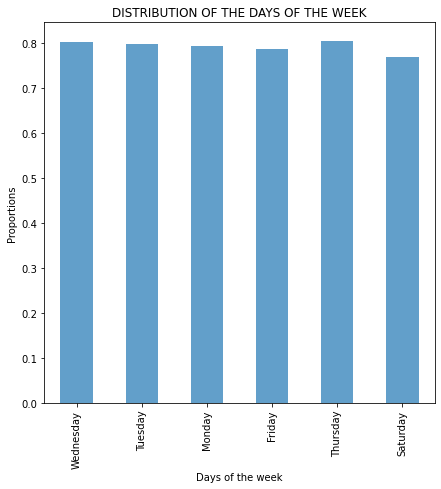

In [69]:
# Defining a function for proportions calculation

def proportion(counts, total):
    proportions = counts / total
    return proportions

# Defining a function for the bar plots
def plot_kind(df_1, kind_type, XLABEL, YLABEL, TITLE):
    df_1.plot(kind = kind_type, subplots = False, figsize = (7,7), alpha = .7)
    plt.xlabel(XLABEL)
    plt.ylabel(YLABEL)
    plt.title(TITLE)
    plt.show();
    
count_day = showed_up.Appointment_day.value_counts()
total_day = df.Appointment_day.value_counts()
plot_kind(proportion(count_day, total_day), 'bar', 'Days of the week', 'Proportions', 'DISTRIBUTION OF THE DAYS OF THE WEEK')

> This barchart is to determine which of the days the patients showed up more.

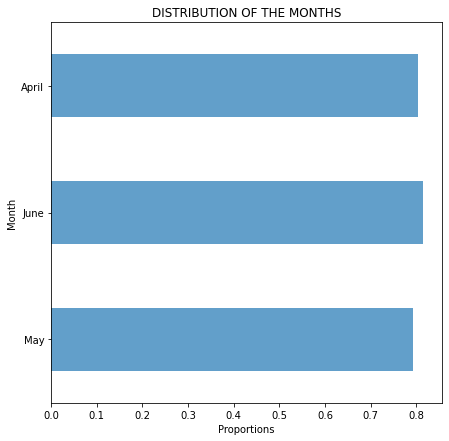

In [70]:
count_month = showed_up.Appointment_month.value_counts()
total_month = df.Appointment_month.value_counts()
plot_kind(proportion(count_month, total_month), 'barh', 'Proportions', 'Month', 'DISTRIBUTION OF THE MONTHS')

> This chart is to determine which of the months did the patients showed up more appointments

### Is showing up for appointments dependent on SMS? 

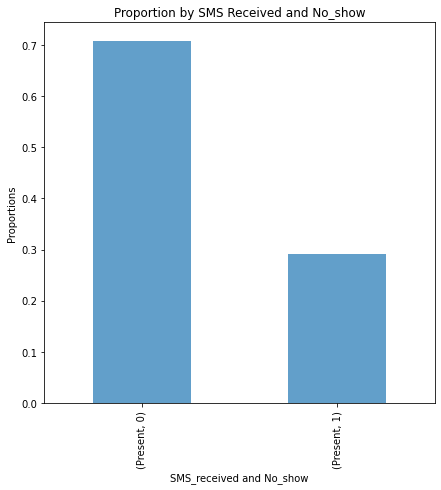

In [71]:
reminder_counts = showed_up.groupby(['No_show', 'SMS_received']).count()['Gender']
reminder_total = df.groupby('No_show').count()['Gender']
plot_kind(proportion(reminder_counts, reminder_total), 'bar', 'SMS_received and No_show', 'Proportions', 'Proportion by SMS Received and No_show')

> This chart is to determine if sending an SMS is dependent on patients showing up for their appointments.

### Which hospital do patients visit the most for thier appointments?

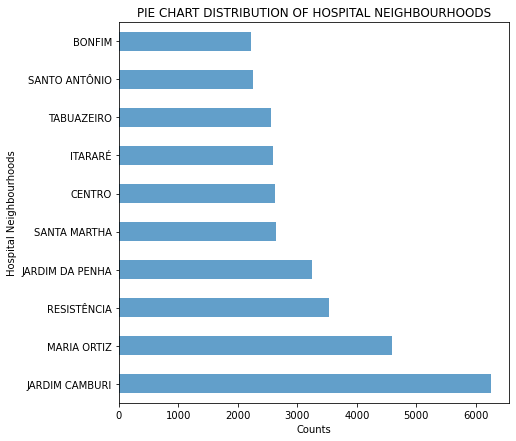

In [72]:
hospital_df = showed_up['Neighbourhood'].value_counts(sort = True).head(10)
plot_kind(hospital_df, 'barh', 'Counts', 'Hospital Neighbourhoods', 'PIE CHART DISTRIBUTION OF HOSPITAL NEIGHBOURHOODS')

> This chart is to determine the hospitlas patients visit the most for their appointments

 ### Which days do patients on scholarship showed up the least for their appointment?

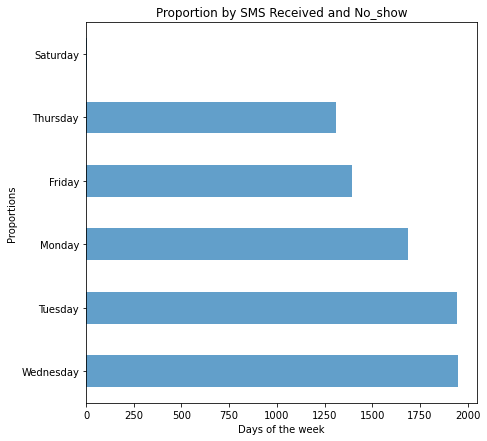

In [73]:
scholarship_df = showed_up.query('Scholarship == 1')
week_counts = scholarship_df.Appointment_day.value_counts(sort = True)
plot_kind(week_counts, 'barh', 'Days of the week', 'Proportions', 'Proportion by SMS Received and No_show')

> This barchart is to determine the days which patients on scholarship showed up the least for their appointments.

### Which age category showed up for thier appointments the most?

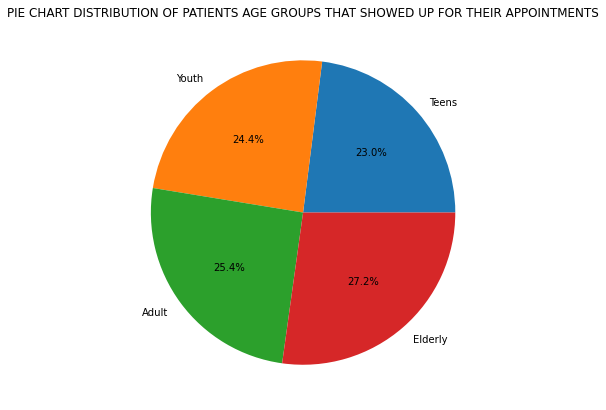

In [74]:
# Defining a function for the pie plots

def plot_pie(df_1, kind_type, YLABEL, TITLE):
    df_1.plot(kind = kind_type, subplots = False, figsize = (7,7), autopct='%1.1f%%')
    plt.title(TITLE)
    plt.ylabel(YLABEL)
    plt.show();
    
age_df = showed_up.groupby('Age_groups').size()
plot_pie(age_df, 'pie', '', 'PIE CHART DISTRIBUTION OF PATIENTS AGE GROUPS THAT SHOWED UP FOR THEIR APPOINTMENTS')  

> This pie chart shows the distribution of patients age groups that showed up for thier appointment. 

### Is showing up for appointments dependent on gender?

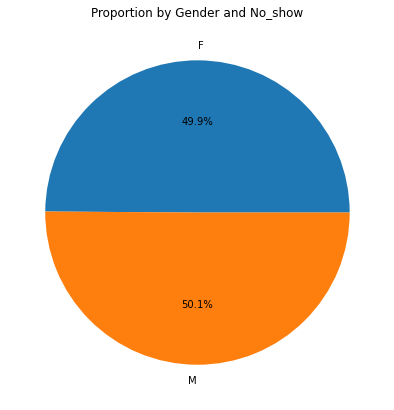

In [75]:
gender_counts = showed_up.groupby(['Gender']).count()['Hypertension']
gender_total = df.groupby('Gender').count()['Hypertension']
plot_pie(proportion(gender_counts, gender_total), 'pie', '', 'Proportion by Gender and No_show')  

> This pie chart is to determine if showing up for appointments is dependent on gender

### What's the percentage of patients who scheduled and showed up for their appointments on the same day?

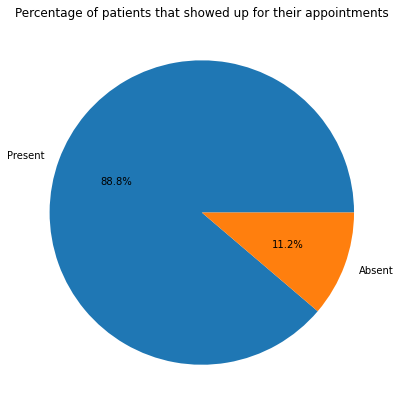

In [76]:
schedule_appointment_day = df.query("Scheduled_day == Appointment_day")
schedule_appointment_day_df = schedule_appointment_day.No_show.value_counts(normalize = True)
plot_pie(schedule_appointment_day_df, 'pie', '', 'Percentage of patients that showed up for their appointments')  

> This pie chart is to determine the percentage of patients who showed up for thier appointment on the scheduled day.

## Conclusions

> After I have investigated, accessed , did the neccessary data cleaning by replacing incorrect column names, removing invalid entries, replaced mismatched values and also carried out exploratoty data analysis on the no show appointment dataset by plotting different charts, below are my conclusions from the dataset.

- There are less patients enrolled in the Brasillian wellfare (that is there are less patients on scholarships.
- There are less patients suffering from hypertension and diabetes.
- There are very few patients that takes alcohol.
- There are very few patients who are handicaped.
- Patients who did not recieve an SMS are more than those who did not recieve an SMS.
- Patients who showed up for thier appointment are more than those who did not show up for thier appointment.
- Patients showed up more on Thursday and in the month of June.
- Showing up for appointment is not dependent on sending an sms to patients.
- Patients visit hospitals in Jardim Camburi and Maria Ortiz neighbourhood the most for thier appointments.
- Patients on scholarship showed up least for their appointments on Thursday and Saturday.
- The elderly age group (that is 55 years and above) showed up for their appointment the most with a percentage of 27.2%
- Showing up for appointment is not dependent on gender.
- Most of the patients showed up for thier appointment at the scheduled day.

## Limitations

> Reasons why patients did not show up for their appointments was not included in the dataset, so further I can't carry out further analysis on that.